In [120]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

# Scientific and Data Manipulation Libraries :
import pandas as pd
import numpy as np
import math

# ML Libraries :
from sklearn.preprocessing            import OneHotEncoder 
from sklearn.preprocessing            import RobustScaler
from sklearn.model_selection          import train_test_split, cross_val_score
from sklearn.metrics                  import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score

# Boosting Algorithms :
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier

# Data Visualization Libraries :
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

In [122]:
df = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [123]:
display('Train Head :',df.head())
display('Test Head :', test.head())

'Train Head :'

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

'Test Head :'

employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0            0                  51  
2                  4              0            0                  47  
3                  9              0            0                  65  
4                  7              0            0                  61

In [124]:
display('Train Info :',df.info())
display('Test Info :',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


'Train Info :'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


'Test Info :'

None

In [125]:
display('Train stats :',df.describe())
display('Test stats :',test.describe())

'Train stats :'

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

'Test stats :'

employee_id  no_of_trainings           age  previous_year_rating  \
count  23490.000000     23490.000000  23490.000000          21678.000000   
mean   39041.399149         1.254236     34.782929              3.339146   
std    22640.809201         0.600910      7.679492              1.263294   
min        3.000000         1.000000     20.000000              1.000000   
25%    19370.250000         1.000000     29.000000              3.000000   
50%    38963.500000         1.000000     33.000000              3.000000   
75%    58690.000000         1.000000     39.000000              4.000000   
max    78295.000000         9.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  
count       23490.000000   23490.000000  23490.000000        23490.000000  
mean            5.810387       0.358834      0.022776           63.263133  
std             4.207917       0.479668      0.149191           13.411750  
min             1.000000       0.000000      0.000000           39.000000  
25%             3.000000       0.000000      0.000000           51.000000  
50%             5.000000       0.000000      0.000000           60.000000  
75%             7.000000       1.000000      0.000000           76.000000  
max            34.000000       1.000000      1.000000           99.000000

In [126]:
def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("")
        
display_unique(df)

No of Unique Values in employee_id Column are : 54808
Actual Unique Values in employee_id Column are : [    1     2     4 ... 78296 78297 78298]

No of Unique Values in department Column are : 9
Actual Unique Values in department Column are : ['Analytics' 'Finance' 'HR' 'Legal' 'Operations' 'Procurement' 'R&D'
 'Sales & Marketing' 'Technology']

No of Unique Values in region Column are : 34
Actual Unique Values in region Column are : ['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']

No of Unique Values in education Column are : 3
Actual Unique Values in education Column are : ["Bachelor's" 'Below Secondary' "Master's & above" nan]

No 

In [127]:
# Display How Each Feature is related to Target Variable in a Flow :

fig = px.parallel_categories(df[['department','education','gender','previous_year_rating','KPIs_met >80%',
                                    'recruitment_channel',
                                   'is_promoted']], 
                             color="is_promoted", 
                             color_continuous_scale=px.colors.sequential.Aggrnyl  )
fig.show()

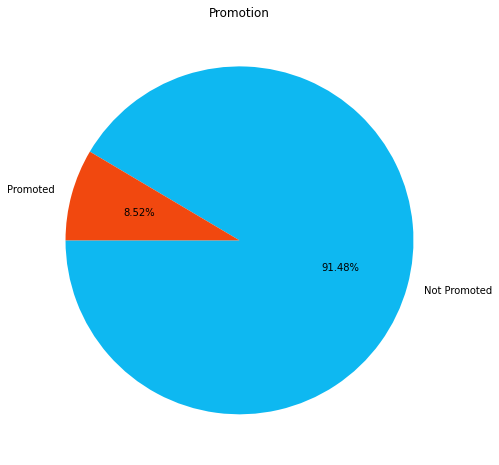

In [128]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.pie(df.is_promoted.value_counts(), labels = ["Not Promoted", "Promoted"], 
       autopct = '%1.2f%%', startangle = 180, colors = ["#0EB8F1", "#F1480F"])

ax.set_title("Promotion")
plt.show()

In [129]:
cat_cols = ["department", "region", "gender", "recruitment_channel", "no_of_trainings", "KPIs_met >80%", "awards_won?"]

num_cols = ["age", "length_of_service", "avg_training_score"]

ord_cols = ["education", "previous_year_rating"]

In [130]:
def count_percentage(df, col, hue):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))
    order = sorted(df[col].unique())
    palette = ["#0EB8F1", "#F1480F"]
    
    sns.countplot(col, data = df, hue = hue, ax = ax1, order = order, palette = palette)
    ax1.set_title("Counts For Feature:\n" + col)

    df_temp = df.groupby(col)[hue].value_counts(normalize = True).\
    rename("percentage").\
    reset_index()
    
    fig = sns.barplot(x = col, y = "percentage", hue = hue, data = df_temp, ax = ax2, order = order, palette = palette)
    fig.set_ylim(0,1)
    
    fontsize = 14 if len(order) <= 10 else 8
    for p in fig.patches:
        
        txt = "{:.1f}".format(p.get_height() * 100) + "%"
        txt_x = p.get_x() 
        txt_y = p.get_height()
        fig.text(txt_x + 0.125, txt_y + 0.02,txt, fontsize = fontsize)

    ax2.set_title("Percentages For Feature: \n" + col)
    plt.setp(ax1.get_xticklabels(), rotation=70, horizontalalignment='right')
    plt.setp(ax2.get_xticklabels(), rotation=70, horizontalalignment='right')

    for ax in [ax1, ax2]:
        ax.set_facecolor("#C7D3D4FF")
        ax.grid(linewidth = 0.25)

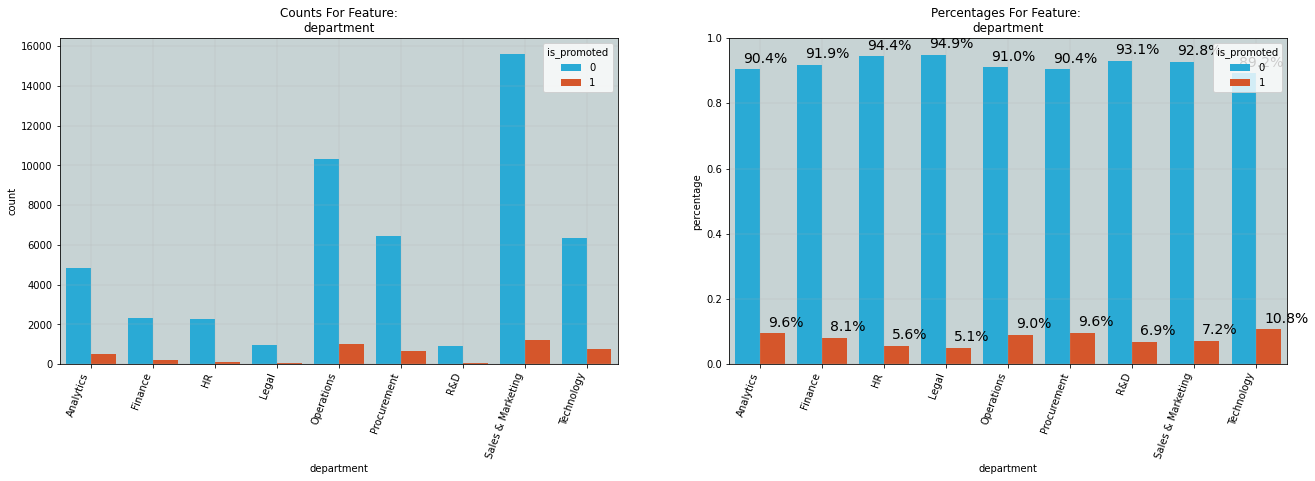

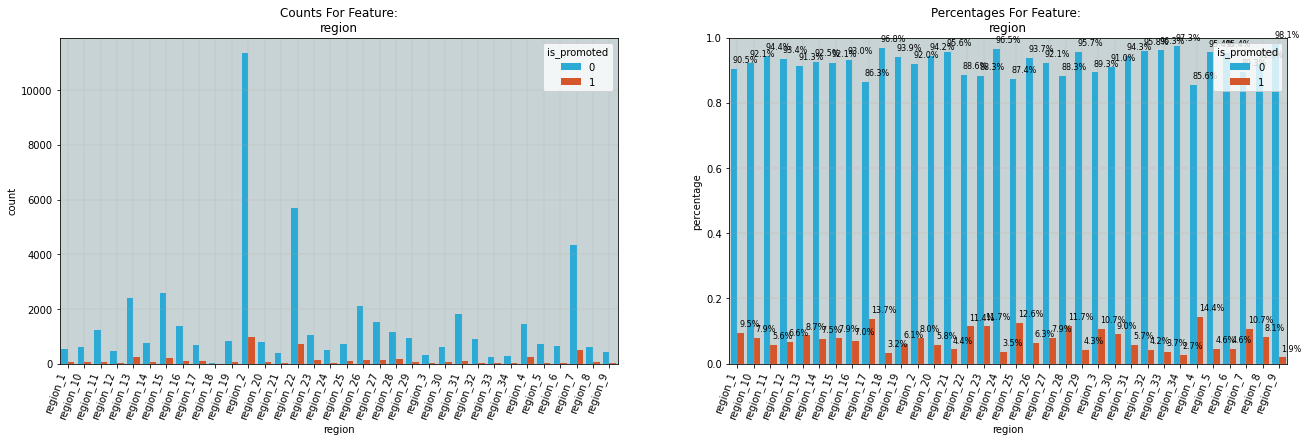

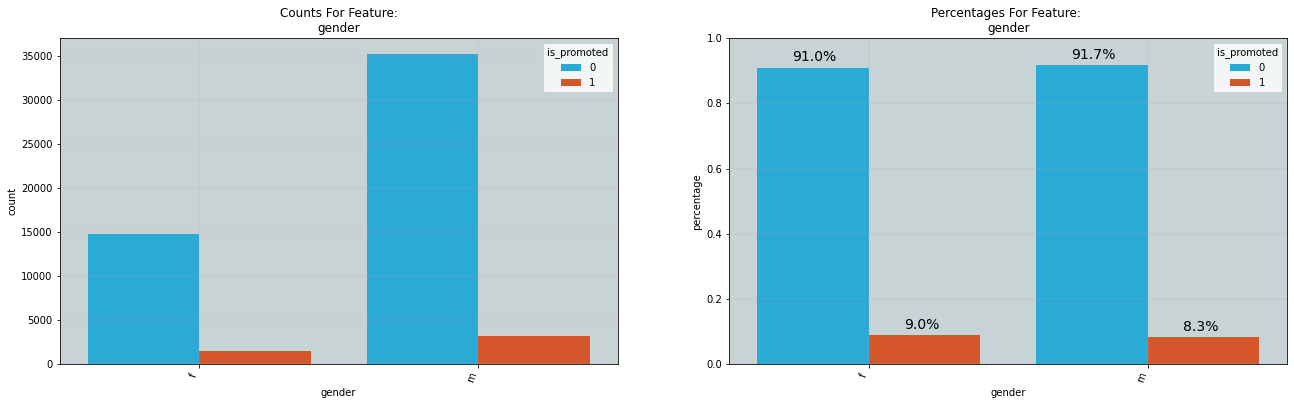

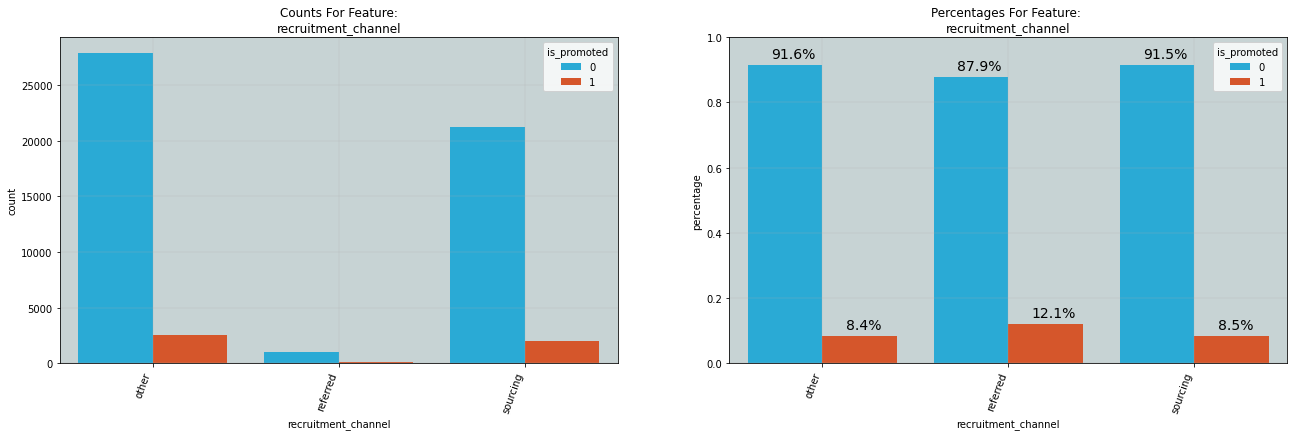

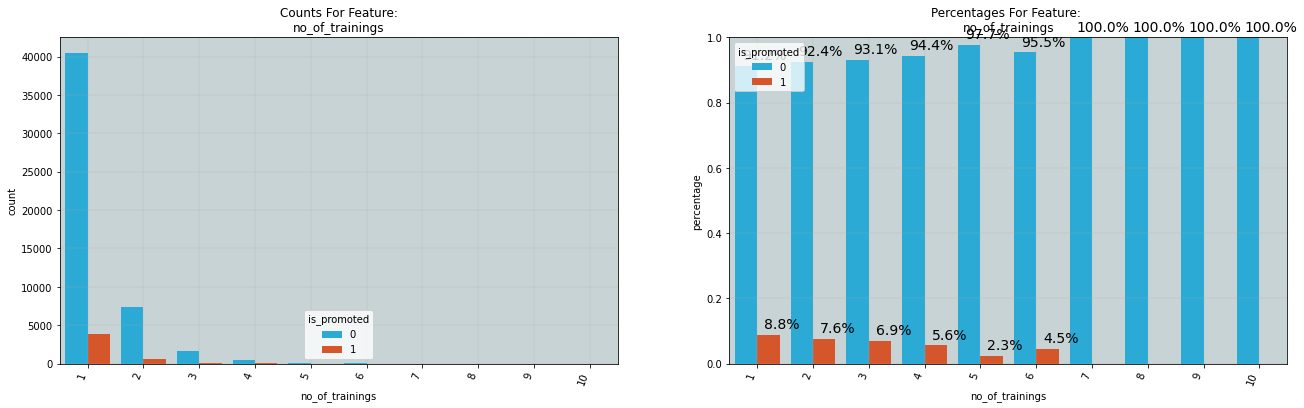

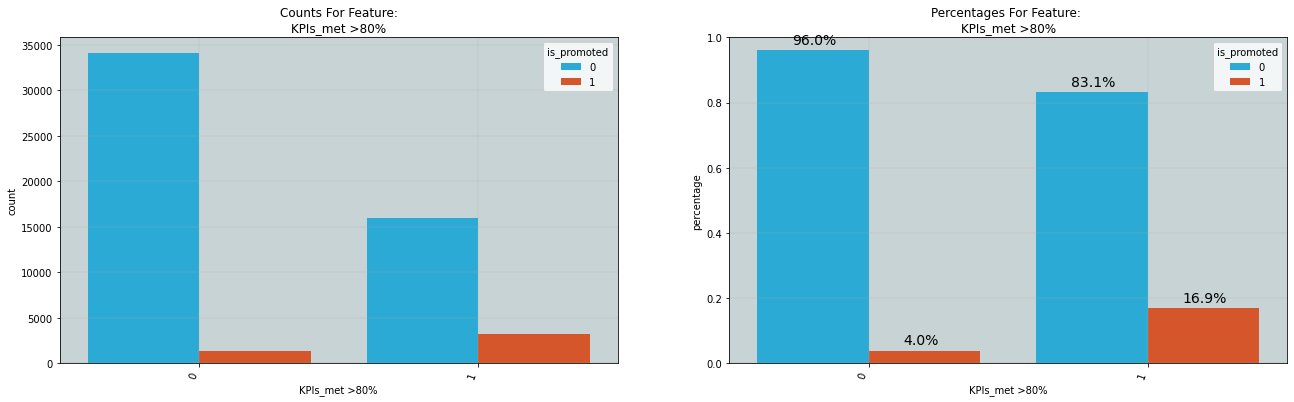

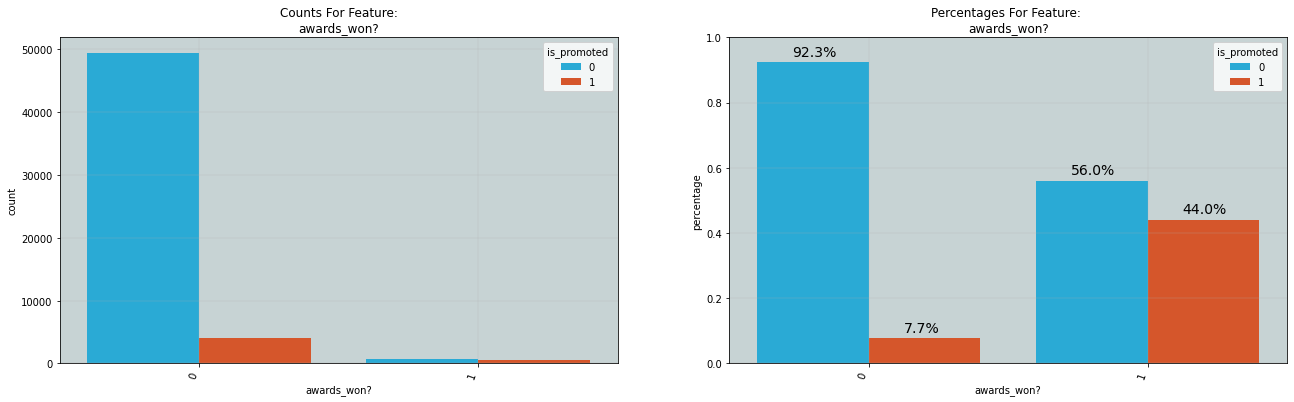

In [131]:
for col in cat_cols:
    count_percentage(df, col, "is_promoted")

In [132]:
def feature_dist_clas(df, col, hue):
    
    fig, axes = plt.subplots(1, 4, figsize = (25, 5))
    order = sorted(df[hue].unique())
    palette = ["#0EB8F1", "#F1480F"]
    
    sns.histplot(x = col, hue = hue, data = df, ax = axes[0], palette = palette, edgecolor="black", linewidth=0.5)
    sns.kdeplot(x = col, hue = hue, data = df, fill = True, ax = axes[1], palette = palette, linewidth = 2)
    sns.boxplot(y = col, hue = hue, data = df, x = [""] * len(df), ax = axes[2], 
                palette = palette, linewidth = 2, flierprops = dict(marker = "x", markersize = 3.5))
    
    sns.violinplot(y = col, hue = hue, data = df, x = [""] * len(df), ax = axes[3], palette = palette)
    
    fig.suptitle("For Feature:  " + col)
    axes[0].set_title("Histogram For Feature " + col)
    axes[1].set_title("KDE Plot For Feature " + col)   
    axes[2].set_title("Boxplot For Feature " + col)   
    axes[3].set_title("Violinplot For Feature " + col)   
    
    for ax in axes:
        ax.set_facecolor("#C7D3D4FF")
        ax.grid(linewidth = 0.25)

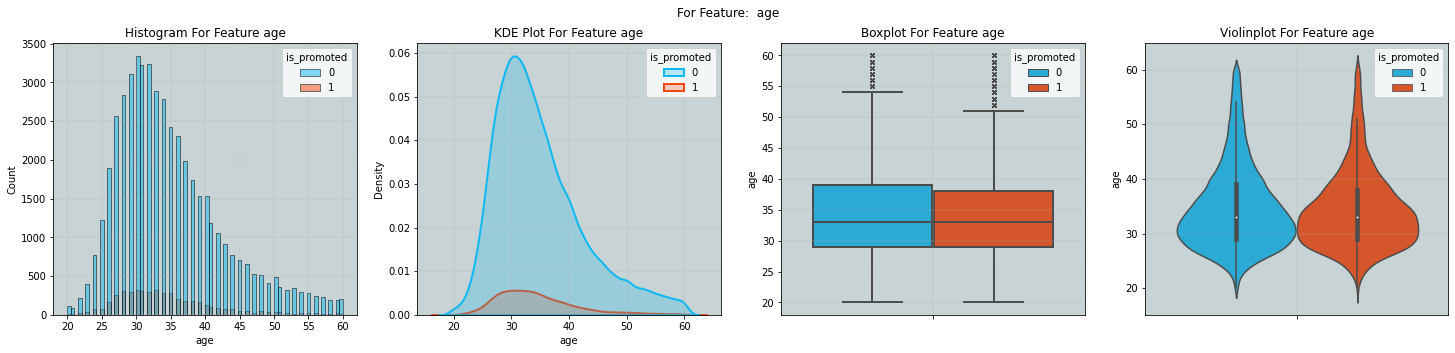

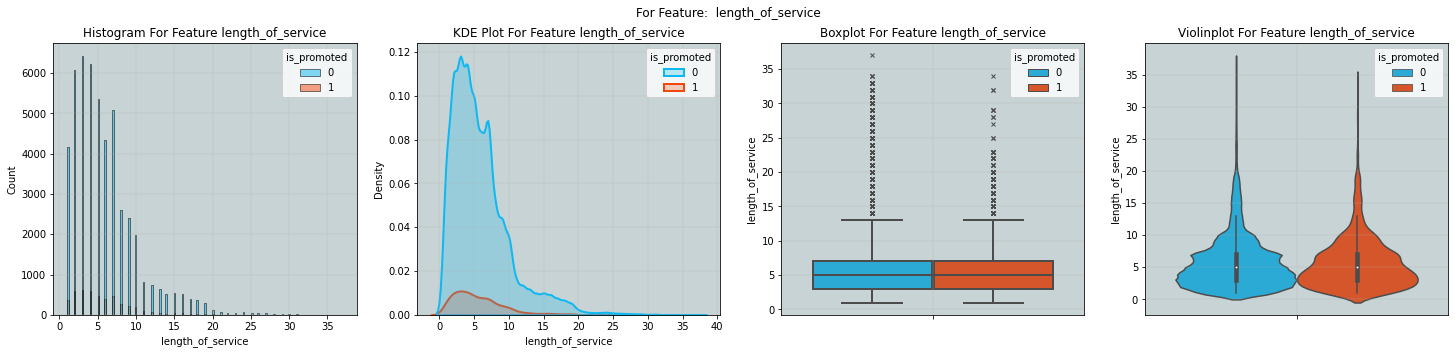

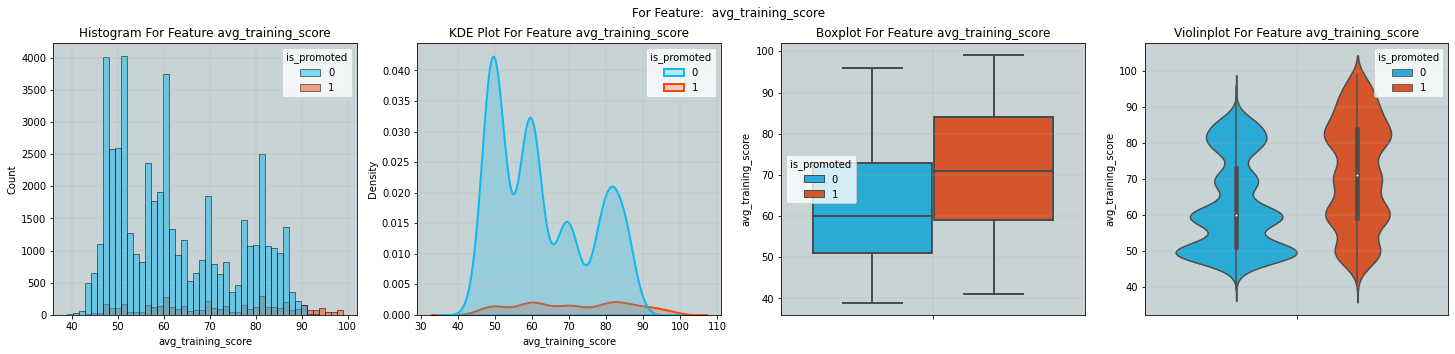

In [133]:
for col in num_cols:
    feature_dist_clas(df, col, "is_promoted")

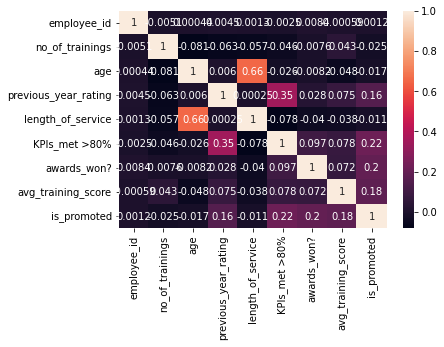

In [134]:
# Display Correlation between Features through HeatMap - Ligther Color Higher Correlation if Close to 1 :

sns.heatmap(df.corr(), annot = True);

In [135]:
# Python Method 4 : Removes Data Duplicates while Retaining the First one - Similar to SQL DISTINCT :

def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    
    return "Checked Duplicates"

# Remove Duplicates from "train" data :

remove_duplicate(df)

# No Duplicates at all !!!

BEFORE REMOVING DUPLICATES - No. of Rows =  54808
AFTER REMOVING DUPLICATES  - No. of Rows =  54808


'Checked Duplicates'

In [136]:
df.drop(['employee_id'], axis=1, inplace=True)
employee=test['employee_id'].to_frame()
test.drop(['employee_id'], axis=1, inplace=True)

In [137]:
type(employee)

pandas.core.frame.DataFrame

In [138]:
# Display the Missing Values
display('Train Null values :',df.isnull().sum())
display('Test Null values :',test.isnull().sum())

'Train Null values :'

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

'Test Null values :'

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [139]:
# Why is Data Missing in Column "previous_year_rating" ? 
# 1. Data was not entered Because those employees were Freshers (i.e) length_of_service = 1 
# 2. No Data would have been there in the Data Source itself for these employees.
# Logically we are imputing with "0" as Freshers with 1 Year Experince may not have previous_year_rating at all!

# Filling Missing Values in Train and Test :

df["previous_year_rating"] = df["previous_year_rating"].fillna(0)
test["previous_year_rating"] = test["previous_year_rating"].fillna(0)

In [140]:
df['Fresher'] = df['previous_year_rating'].apply(lambda x: 'Fresher' if x ==0 else 'Experienced')

display( df['Fresher'].value_counts() )
display( df[["previous_year_rating","length_of_service",'Fresher']][df['Fresher'] =='Fresher'] )
display( df[["previous_year_rating","length_of_service",'Fresher']].head(25) )

del df['Fresher']

Experienced    50684
Fresher         4124
Name: Fresher, dtype: int64

previous_year_rating  length_of_service  Fresher
10                      0.0                  1  Fresher
23                      0.0                  1  Fresher
29                      0.0                  1  Fresher
56                      0.0                  1  Fresher
58                      0.0                  1  Fresher
...                     ...                ...      ...
54703                   0.0                  1  Fresher
54734                   0.0                  1  Fresher
54746                   0.0                  1  Fresher
54773                   0.0                  1  Fresher
54801                   0.0                  1  Fresher

[4124 rows x 3 columns]

previous_year_rating  length_of_service      Fresher
0                    5.0                  8  Experienced
1                    5.0                  4  Experienced
2                    3.0                  7  Experienced
3                    1.0                 10  Experienced
4                    3.0                  2  Experienced
5                    3.0                  7  Experienced
6                    3.0                  5  Experienced
7                    3.0                  6  Experienced
8                    4.0                  5  Experienced
9                    5.0                  5  Experienced
10                   0.0                  1      Fresher
11                   5.0                  3  Experienced
12                   5.0                  5  Experienced
13                   3.0                 16  Experienced
14                   3.0                  7  Experienced
15                   1.0                 10  Experienced
16                   3.0                  5  Experienced
17                   1.0                  4  Experienced
18                   5.0                  8  Experienced
19                   3.0                  9  Experienced
20                   3.0                  7  Experienced
21                   4.0                 11  Experienced
22                   3.0                  4  Experienced
23                   0.0                  1      Fresher
24                   5.0                  7  Experienced

In [141]:
# Display Missing Values in Train and Test data :

df["education"] = df["education"].ffill(axis = 0)
df["education"] = df["education"].bfill(axis = 0)

test["education"] = test["education"].ffill(axis = 0)
test["education"] = test["education"].bfill(axis = 0)

display("Train : ", df.isnull().sum())
display("Test : ", test.isnull().sum())

'Train : '

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

'Test : '

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

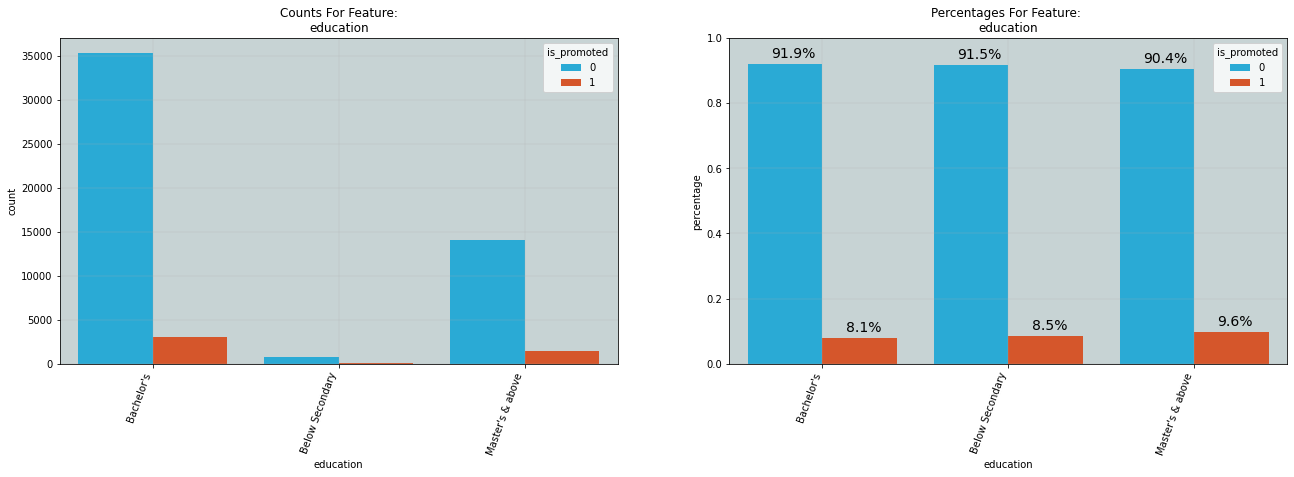

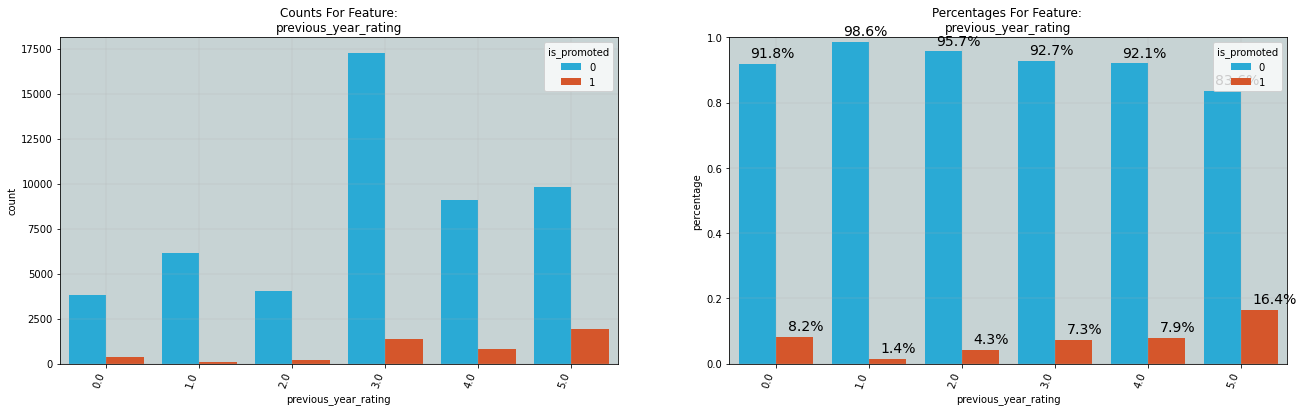

In [142]:
for col in ord_cols:
    count_percentage(df, col, "is_promoted")

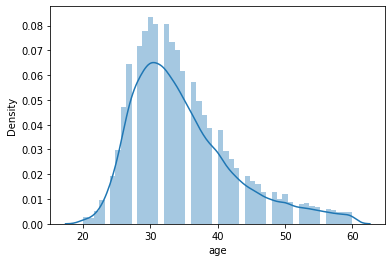

In [143]:
# Based on Age Distribution - Most of the Employees are in range 20-40 who will be also waiting for a Promotion
# so we have created 2 Bins 20-29, 29-39 and remaining 1 Bin for 39-49.
# displot -> plot a univariate(Single Feature) distribution of observations.

sns.distplot(df['age'])

df['age'] = pd.cut( x=df['age'], bins=[20, 29, 39, 49], labels=['20', '30', '40'] )
test['age']  = pd.cut( x=test['age'], bins=[20, 29, 39, 49],  labels=['20', '30', '40'] )

In [144]:
X=df.drop(['is_promoted'], axis=1)
y=df['is_promoted'].to_frame()

In [145]:
X.head()

department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings age  previous_year_rating  length_of_service  \
0                1  30                   5.0                  8   
1                1  30                   5.0                  4   
2                1  30                   3.0                  7   
3                2  30                   1.0                 10   
4                1  40                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  
0              1            0                  49  
1              0            0                  60  
2              0            0                  50  
3              0            0                  50  
4              0            0                  73

In [146]:
y.head(20)

is_promoted
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            1
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0

In [147]:
X_encode = pd.get_dummies(X, columns = ["region", "age","department", "education", "gender", "recruitment_channel"])
X_encode.head()
X_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               54808 non-null  int64  
 1   previous_year_rating          54808 non-null  float64
 2   length_of_service             54808 non-null  int64  
 3   KPIs_met >80%                 54808 non-null  int64  
 4   awards_won?                   54808 non-null  int64  
 5   avg_training_score            54808 non-null  int64  
 6   region_region_1               54808 non-null  uint8  
 7   region_region_10              54808 non-null  uint8  
 8   region_region_11              54808 non-null  uint8  
 9   region_region_12              54808 non-null  uint8  
 10  region_region_13              54808 non-null  uint8  
 11  region_region_14              54808 non-null  uint8  
 12  region_region_15              54808 non-null  uint8  
 13  r

In [148]:
test_encode = pd.get_dummies(test, columns = ["region", "age","department", "education", "gender", "recruitment_channel"])
test_encode.head()
test_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               23490 non-null  int64  
 1   previous_year_rating          23490 non-null  float64
 2   length_of_service             23490 non-null  int64  
 3   KPIs_met >80%                 23490 non-null  int64  
 4   awards_won?                   23490 non-null  int64  
 5   avg_training_score            23490 non-null  int64  
 6   region_region_1               23490 non-null  uint8  
 7   region_region_10              23490 non-null  uint8  
 8   region_region_11              23490 non-null  uint8  
 9   region_region_12              23490 non-null  uint8  
 10  region_region_13              23490 non-null  uint8  
 11  region_region_14              23490 non-null  uint8  
 12  region_region_15              23490 non-null  uint8  
 13  r

In [149]:
from sklearn.preprocessing import RobustScaler
sc_X = RobustScaler()
X_scale = sc_X.fit_transform(X_encode)
test_scale=sc_X.fit_transform(test_encode)

In [150]:
type(X_scale)

numpy.ndarray

In [151]:
X_scale=pd.DataFrame(X_scale)

In [152]:
test_scale=pd.DataFrame(test_scale)

In [153]:
# Splitting the dataset into train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.20, random_state=5)
print(len(X_train), len(X_test))

43846 10962


In [154]:
# Create a Dictionary (Key->Value Pairs) for "ML Model Name"-> "ML Model Functions with Hyper-Parameters" :

Classifiers = {'XGBoost' : XGBClassifier(),
                            
               'CatBoost' : CatBoostClassifier(),
               
               'LightGBM' : LGBMClassifier()
 }

print( list(Classifiers.keys()) )
print( list(Classifiers.values()) )

['XGBoost', 'CatBoost', 'LightGBM']
[XGBClassifier(), <catboost.core.CatBoostClassifier object at 0x7f003abff610>, LGBMClassifier()]


In [155]:
tab=pd.DataFrame()

def mod(name,model,x,y):
  model.fit(x, y)

  scores = cross_val_score(model, x, y, cv=5)
  v=round(sum(scores)*100/len(scores),3)

  

  rec=round(recall_score(y_test,model.predict(X_test)),3)

  
  result=[name, v, rec]
  return (result)

In [156]:
for i in range(0,3):
  a= pd.DataFrame(mod(list(Classifiers.keys())[i], list(Classifiers.values())[i],X_train, y_train)).transpose()
  tab=pd.concat([tab,a], axis=0, ignore_index=True)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.4771127	total: 44.2ms	remaining: 8.79s
5:	learn: 0.4525189	total: 52.2ms	remaining: 8.65s
6:	learn: 0.4239216	total: 60.5ms	remaining: 8.58s
7:	learn: 0.3898702	total: 69.8ms	remaining: 8.65s
8:	learn: 0.3737545	total: 78ms	remaining: 8.59s
9:	learn: 0.3599016	total: 86.6ms	remaining: 8.58s
10:	learn: 0.3472489	total: 95.8ms	remaining: 8.62s
11:	learn: 0.3359346	total: 103ms	remaining: 8.5s
12:	learn: 0.3244941	total: 111ms	remaining: 8.45s
13:	learn: 0.3150824	total: 119ms	remaining: 8.41s
14:	learn: 0.3015262	total: 131ms	remaining: 8.57s
15:	learn: 0.2945638	total: 139ms	remaining: 8.57s
16:	learn: 0.2883577	total: 148ms	remaining: 8.55s
17:	learn: 0.2794324	total: 156ms	remaining: 8.53s
18:	learn: 0.2694959	total: 173ms	remaining: 8.91s
19:	learn: 0.2639955	total: 181ms	remaining: 8.85s
20:	learn: 0.2570668	total: 200ms	remaining: 9.32s
21:	learn: 0.2531198	total: 213ms	remaining: 9.47s
22:	learn: 0.2505089	total: 222ms

In [157]:
tab.set_axis(['Model', 'Cross Val Score', 'Recall Score'], axis='columns', inplace=True)

In [158]:
tab

Model Cross Val Score Recall Score
0   XGBoost          93.728        0.271
1  CatBoost          94.168        0.348
2  LightGBM          94.207        0.339

In [159]:
cat=CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred=cat.predict(X_test)

Learning rate set to 0.051765
0:	learn: 0.6148102	total: 10.6ms	remaining: 10.6s
1:	learn: 0.5611892	total: 21.4ms	remaining: 10.7s
2:	learn: 0.5223153	total: 31.1ms	remaining: 10.3s
3:	learn: 0.4887241	total: 43ms	remaining: 10.7s
4:	learn: 0.4582877	total: 55.8ms	remaining: 11.1s
5:	learn: 0.4249077	total: 66.4ms	remaining: 11s
6:	learn: 0.3972365	total: 76.1ms	remaining: 10.8s
7:	learn: 0.3785111	total: 85.9ms	remaining: 10.6s
8:	learn: 0.3621414	total: 96.8ms	remaining: 10.7s
9:	learn: 0.3486805	total: 110ms	remaining: 10.8s
10:	learn: 0.3278585	total: 121ms	remaining: 10.9s
11:	learn: 0.3146801	total: 131ms	remaining: 10.8s
12:	learn: 0.3024373	total: 142ms	remaining: 10.8s
13:	learn: 0.2938449	total: 152ms	remaining: 10.7s
14:	learn: 0.2864233	total: 162ms	remaining: 10.6s
15:	learn: 0.2773390	total: 172ms	remaining: 10.6s
16:	learn: 0.2702676	total: 182ms	remaining: 10.5s
17:	learn: 0.2574397	total: 199ms	remaining: 10.9s
18:	learn: 0.2538746	total: 210ms	remaining: 10.8s
19:	le

In [160]:
display('Accuracy Score :', accuracy_score(y_test, y_pred))
display('Precision Score:', precision_score(y_test, y_pred))
display('Recall Score:', recall_score(y_test, y_pred))
display('F1 Score :', f1_score(y_test, y_pred))

'Accuracy Score :'

0.9434409779237365

'Precision Score:'

0.9298245614035088

'Recall Score:'

0.3479212253829322

'F1 Score :'

0.5063694267515924

In [171]:
y_pred=pd.DataFrame(y_pred)

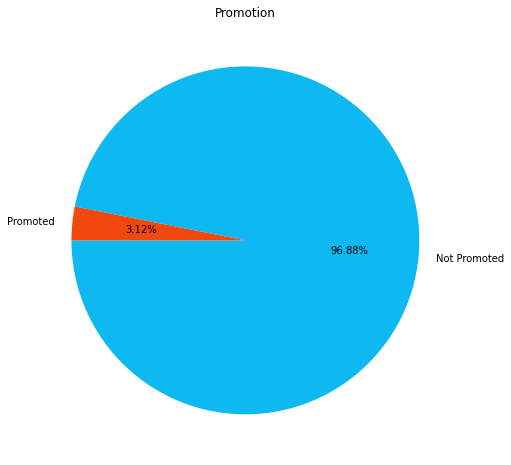

In [172]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.pie(y_pred.value_counts(), labels = ["Not Promoted", "Promoted"], 
       autopct = '%1.2f%%', startangle = 180, colors = ["#0EB8F1", "#F1480F"])

ax.set_title("Promotion")
plt.show()

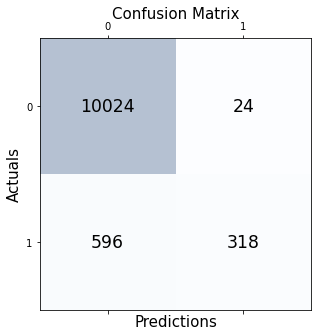

In [173]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [174]:
pred=cat.predict(test_scale)

In [175]:
pred=pd.DataFrame(pred)

In [176]:
prediction=pd.concat([employee,pred], axis=1)
prediction.set_axis(['employee_id', 'is_promoted'], axis='columns', inplace=True)
prediction.to_csv('Result_Promoted.csv',index=False)

In [177]:
prediction.head(40)

employee_id  is_promoted
0          8724            0
1         74430            0
2         72255            0
3         38562            0
4         64486            0
5         46232            0
6         54542            0
7         67269            0
8         66174            0
9         76303            0
10        60245            0
11        42639            0
12        30963            0
13        54055            0
14        42996            0
15        12737            0
16        27561            0
17        26622            0
18        31582            0
19        29793            0
20        72735            0
21         5677            0
22        60889            0
23        51498            0
24         8566            0
25        53151            0
26        16203            0
27        61083            0
28        74849            0
29        13259            0
30        72407            0
31        65237            0
32        67672            1
33        77460            0
34        67317            0
35        68788            0
36        36834            0
37        64281            0
38         1822            0
39        55325            0

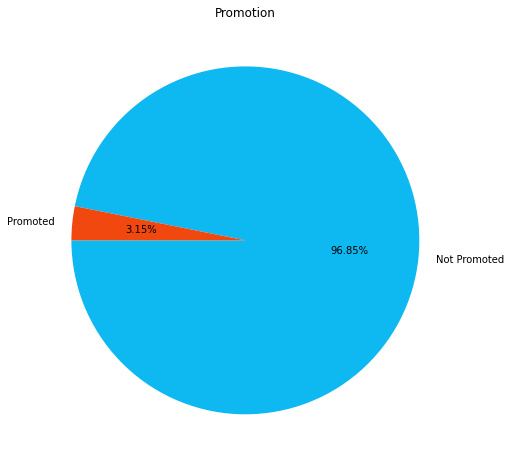

In [178]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.pie(prediction.is_promoted.value_counts(), labels = ["Not Promoted", "Promoted"], 
       autopct = '%1.2f%%', startangle = 180, colors = ["#0EB8F1", "#F1480F"])

ax.set_title("Promotion")
plt.show()